# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flights.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution.

In [3]:
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [5]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


# **Maped  binary values 0.0 and 1.0 to categorical labels 0.0 to Ontime and 1.0 to late**

In [6]:
# AS at DepDel15   have null values 2761 so
# maped  binary values 0.0 and 1.0 to categorical labels 0.0 to On time and 1.0 to late
df['DepDel15'] = df['DepDel15'].fillna(0)
df['DepDel15'] = pd.Series(df['DepDel15'].map({0: 'OnTime', 1: 'Late'}))
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,OnTime,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,OnTime,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,OnTime,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,Late,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,OnTime,728,-9,0,0


In [7]:
# All the null values are removed
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

# **Visualize the data using boxplots**

# **Identifying and eliminate any outliers in the DepDelay and ArrDelay columns**.

Text(0.5, 1.0, 'ArrDelay Boxplot')

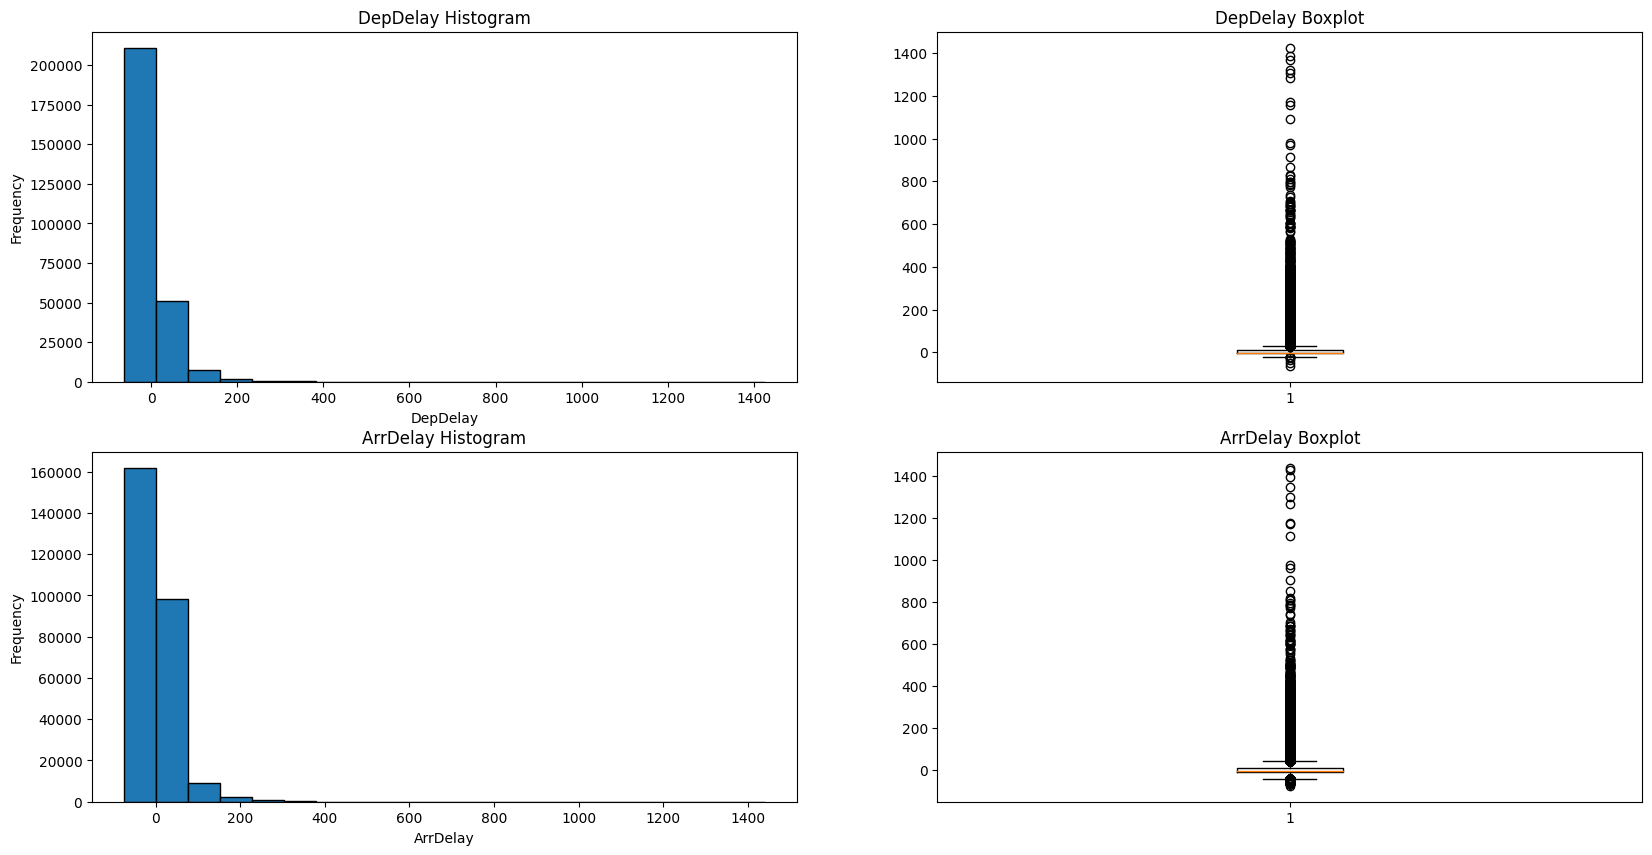

In [8]:
# Plotting histograms and boxplots
plt.figure(figsize=(20, 10))

# DepDelay Histogram
plt.subplot(2, 2, 1)
plt.hist(df['DepDelay'], bins=20, edgecolor='black')
plt.title('DepDelay Histogram')
plt.xlabel('DepDelay')
plt.ylabel('Frequency')

# DepDelay Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(df['DepDelay'])
plt.title('DepDelay Boxplot')

# ArrDelay Histogram
plt.subplot(2, 2, 3)
plt.hist(df['ArrDelay'], bins=20, edgecolor='black')
plt.title('ArrDelay Histogram')
plt.xlabel('ArrDelay')
plt.ylabel('Frequency')

# ArrDelay Boxplot
plt.subplot(2, 2, 4)
plt.boxplot(df['ArrDelay'])
plt.title('ArrDelay Boxplot')


# **Define a function to detect outliers using IQR**




In [9]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# **Remove outliers from 'DepDelay' and 'ArrDelay'**

In [10]:
df_cleaned = remove_outliers(df, 'DepDelay')
df_cleaned = remove_outliers(df_cleaned, 'ArrDelay')

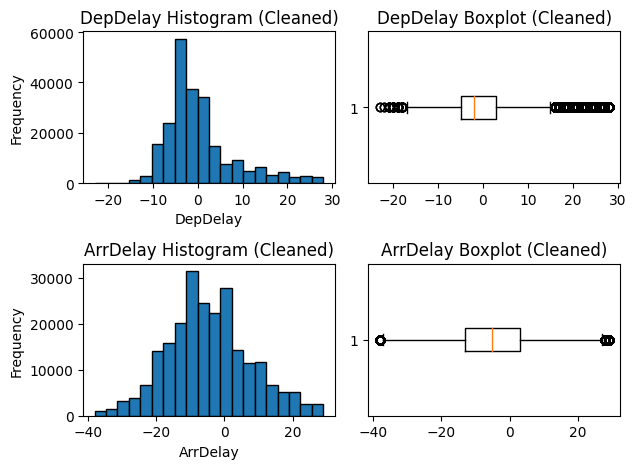

In [11]:
# DepDelay Histogram
plt.subplot(2, 2, 1)
plt.hist(df_cleaned['DepDelay'], bins=20, edgecolor='black')
plt.title('DepDelay Histogram (Cleaned)')
plt.xlabel('DepDelay')
plt.ylabel('Frequency')

# DepDelay Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(df_cleaned['DepDelay'], vert=False)
plt.title('DepDelay Boxplot (Cleaned)')

# ArrDelay Histogram
plt.subplot(2, 2, 3)
plt.hist(df_cleaned['ArrDelay'], bins=20, edgecolor='black')
plt.title('ArrDelay Histogram (Cleaned)')
plt.xlabel('ArrDelay')
plt.ylabel('Frequency')

# ArrDelay Boxplot
plt.subplot(2, 2, 4)
plt.boxplot(df_cleaned['ArrDelay'], vert=False)
plt.title('ArrDelay Boxplot (Cleaned)')

# Show the plots
plt.tight_layout()

# **Summary Statistics for Numeric Fields**

In [12]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,2359.000000,1440.000000,1.000000,1.000000


# **What are the average (mean) departure and arrival delays?**

In [13]:
avg_dep_delay = df['DepDelay'].mean()
avg_arr_delay = df['ArrDelay'].mean()

print("Average Departure Delay:", avg_dep_delay)
print("Average Arrival Delay:", avg_arr_delay)

Average Departure Delay: 10.350448628373906
Average Arrival Delay: 6.496649996322718


# Q 2.2 How do the carriers compare in terms of arrival delay performance?

In [14]:
df = pd.DataFrame(df)

# Calculated mean arrival delay for each carrier
mean_arr_delay = df.groupby('Carrier')['ArrDelay'].mean()

# Calculate median arrival delay for each carrier
median_arr_delay = df.groupby('Carrier')['ArrDelay'].median()

# Calculate percentage of flights delayed beyond 15 minutes for each carrier
flights_delayed_15 = df[df['ArrDelay'] > 15].groupby('Carrier')['ArrDelay'].count()
total_flights = df.groupby('Carrier')['ArrDelay'].count()
percentage_delayed_15 = (flights_delayed_15 / total_flights) * 100

# Combine results into a DataFrame for easy comparison
carrier_performance = pd.DataFrame({
    'Mean Arrival Delay': mean_arr_delay,
    'Median Arrival Delay': median_arr_delay,
    '% Flights Delayed > 15 mins': percentage_delayed_15
})

print("Comparison of Carriers Based on Arrival Delay Performance:")
print(carrier_performance)

Comparison of Carriers Based on Arrival Delay Performance:
         Mean Arrival Delay  Median Arrival Delay  % Flights Delayed > 15 mins
Carrier                                                                       
9E                 5.100463                  -6.0                    18.240961
AA                 7.288294                  -3.0                    20.687991
AS                -0.129657                  -3.0                    11.369012
B6                 9.841757                  -3.0                    24.099790
DL                 2.415259                  -6.0                    14.700379
EV                10.112552                  -4.0                    23.442024
F9                11.460147                   2.0                    23.007349
FL                 7.611958                  -2.0                    20.345305
HA                 1.443321                  -3.0                     7.237892
MQ                13.220602                   0.0                    26.

# Q2.3 Is there a noticable difference in arrival delays for different days of the week?

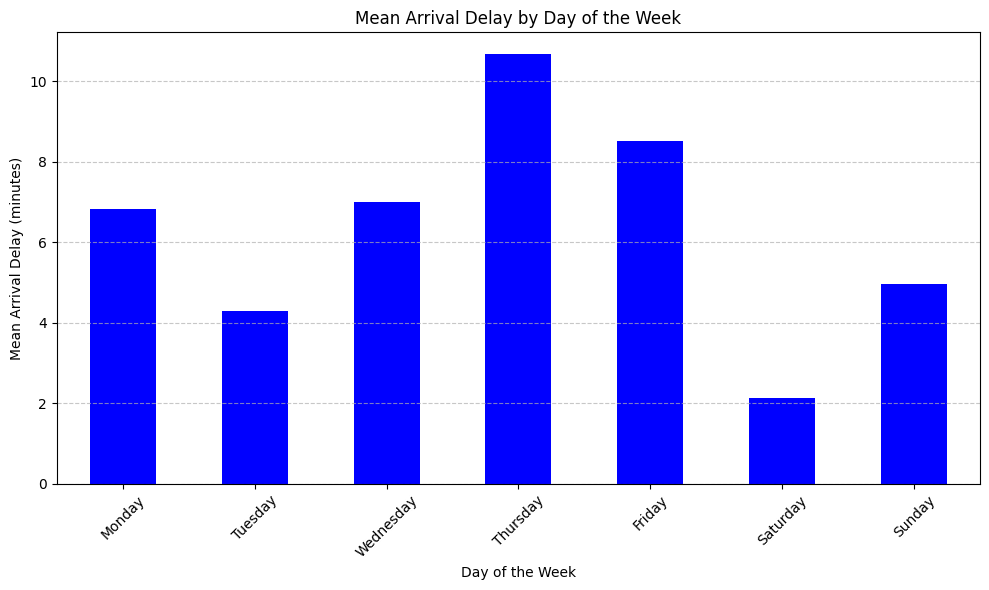

In [15]:
# Calculate mean arrival delay for each day of the week
mean_arr_delay_by_day = df.groupby('DayOfWeek')['ArrDelay'].mean()

# Define days of the week labels
days_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the results
plt.figure(figsize=(10, 6))
mean_arr_delay_by_day.plot(kind='bar', color='blue')
plt.xticks(mean_arr_delay_by_day.index - 1, days_labels, rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.title('Mean Arrival Delay by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Q 2.4 Which departure airport has the highest average departure delay?


In [16]:
# Calculate mean departure delay for each departure airport
mean_dep_delay_by_airport = df.groupby('OriginAirportName')['DepDelay'].mean()

# Find the airport with the highest average departure delay
airport_with_highest_delay = mean_dep_delay_by_airport.idxmax()
highest_avg_delay = mean_dep_delay_by_airport.max()

print(f"The departure airport with the highest average departure delay is '{airport_with_highest_delay}' with an average delay of {highest_avg_delay:.2f} minutes.")

The departure airport with the highest average departure delay is 'Chicago O'Hare International' with an average delay of 16.26 minutes.


# Q 2.5 Do late departures tend to result in longer arrival delays than on-time departures?


Mean Arrival Delay by Departure Category:
DepartureCategory
Late       27.051185
On Time    -7.846955
Name: ArrDelay, dtype: float64


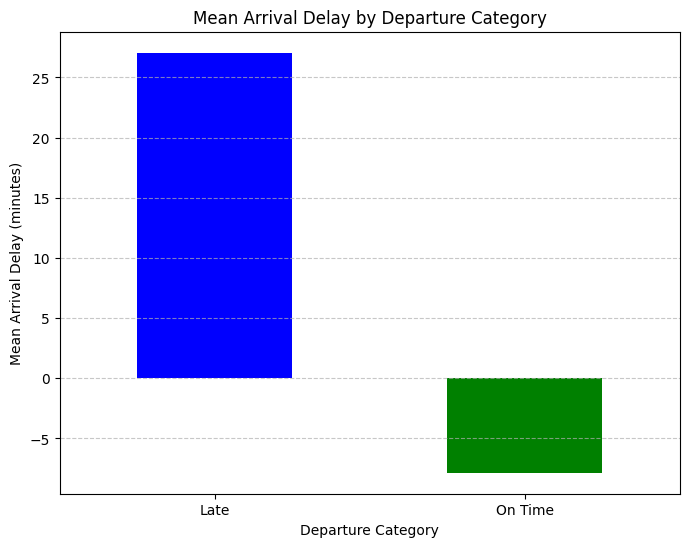

In [17]:
# Categorize flights into 'On Time' and 'Late' based on departure delay
df['DepartureCategory'] = ['Late' if delay > 0 else 'On Time' for delay in df['DepDelay']]

# Calculate mean arrival delay for each departure category
mean_arr_delay_by_dep_category = df.groupby('DepartureCategory')['ArrDelay'].mean()

print("Mean Arrival Delay by Departure Category:")
print(mean_arr_delay_by_dep_category)

plt.figure(figsize=(8, 6))
mean_arr_delay_by_dep_category.plot(kind='bar', color=['blue', 'green'])
plt.title('Mean Arrival Delay by Departure Category')
plt.xlabel('Departure Category')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Q2.6 Which route (from origin airport to destination airport) has the most late arrivals?

In [20]:
# Filter data for late arrivals (ArrDelay15 == 1)
late_arrivals = df[df['ArrDel15'] == 1]

# Group by route (OriginAirportID and DestAirportID) and count late arrivals
route_late_arrivals = late_arrivals.groupby(['OriginAirportID', 'DestAirportID']).size().reset_index(name='LateArrivals')

# Find the route with the maximum late arrivals
max_late_arrivals_route = route_late_arrivals.loc[route_late_arrivals['LateArrivals'].idxmax()]

print("Route with the Most Late Arrivals:")
print(f"From Origin Airport ID {max_late_arrivals_route['OriginAirportID']} to Destination Airport ID {max_late_arrivals_route['DestAirportID']} with {max_late_arrivals_route['LateArrivals']} late arrivals.")



Route with the Most Late Arrivals:
From Origin Airport ID 12892 to Destination Airport ID 14771 with 324 late arrivals.


# Q 2.7Which route has the highest average arrival delay?

In [24]:

# Group by route (OriginAirportID and DestAirportID) and calculate average arrival delay
avg_arr_delay_by_route = df.groupby(['OriginAirportID', 'DestAirportID'])['ArrDelay'].mean().reset_index()

# Find the route with the highest average arrival delay
max_avg_delay_route = avg_arr_delay_by_route.loc[avg_arr_delay_by_route['ArrDelay'].idxmax()]

print("Route with the Highest Average Arrival Delay:")
print(f"From Origin Airport ID {max_avg_delay_route['OriginAirportID']} to Dest Airport ID {max_avg_delay_route['DestAirportID']} with an average arrival delay of {max_avg_delay_route['ArrDelay']:.2f} minutes.")


Route with the Highest Average Arrival Delay:
From Origin Airport ID 14635.0 to Dest Airport ID 11292.0 with an average arrival delay of 81.00 minutes.
